# Hyperparameter Tuning and Pruning in Decision Trees - Lab 

## Introduction 

In this lab we will use the titanic dataset to see the impact of pruning and hyper parameter tuning on the predictive performance of decision tree classifier. 

Pruning reduces the size of the decision trees by removing nodes of the tree that do not provide power to classify instances. 

Decision trees are the most susceptible out of all the machine learning algorithms to overfitting, and effective pruning can reduce this likelihood. 

In this lab, we shall work with the Titanic dataset and see how we can tweak different hyper parameters for optimal pruning of the trees. 

## Objectives 

You will be able to: 
- Demonstrate how pruning is performed for decision trees
- Understand and explain the role of different Decision tree hyperparameters 
- Select the best values for chosen hyperparamters and monitor the improvement in performance

## Import necessary libraries 

Let's first import the libraries you would need for this lab.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
plt.style.use('seaborn')

## Read the Titanic Dataset 

In the repo, we have made titanic dataset, all cleaned up and pre-processed for you, so that you can focus on pruning and optimization. The features set is available as `features.csv` and target variable as `target.csv`. 

* Load these files into separate dataframes below.
* Check the shape for consistency and view the head. 

In [2]:
# Load features and target variables 
feat = pd.read_csv('features.csv')
target = pd.read_csv('target.csv')
print(feat.shape, target.shape)
print(feat.head())
print(target.head())

(891, 13) (891, 1)
   PassengerId   Age  SibSp  Parch     Fare  Pclass_1  Pclass_2  Pclass_3  \
0            1  22.0      1      0   7.2500         0         0         1   
1            2  38.0      1      0  71.2833         1         0         0   
2            3  26.0      0      0   7.9250         0         0         1   
3            4  35.0      1      0  53.1000         1         0         0   
4            5  35.0      0      0   8.0500         0         0         1   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0           0         1           0           0           1  
1           1         0           1           0           0  
2           1         0           0           0           1  
3           1         0           0           0           1  
4           0         1           0           0           1  
   Survived
0         0
1         1
2         1
3         1
4         0


This is great. Now that we have our x (feat) and y (target), we can go ahead and make a split necessary for supervised learning. 

## Create a 70/30 train/test split 

* Using features and target variables above, create a 70/30 split using 

In [3]:
# Create a 70/30 split for given X and y
X_train, X_test, y_train, y_test = train_test_split(feat, target, test_size=0.3)

So now that we have our data ready for training, let's first train a DT classifier with this data.

## Train a Vanilla Classifier

__Note:__ The term "vanilla" is used for machine learning algorithm with its default settings (no tweaking/tuning). 

- Create a decision tree instance.
- Fit a DT classifier with training dataset using all default settings for hyperparameters i.e. we won't change any parameter. 
- Set the impurity criteria to "entropy". 

In [4]:
# Train the classifier using training data 

# Instantiate 
dt = DecisionTreeClassifier(criterion='entropy')

# Train the classifier
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Make predictions 

* Create a set of predictions using the test set 
* Using `y_test` and `y_pred`, calculate the AUC (Area under curve) to check the predictive performance

In [5]:
# Make predictions using test set 
y_pred = dt.predict(X_test)

# Check the AUC of predictions 
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Compute area under the ROC curve
roc_auc = auc(fpr,tpr)
roc_auc

0.7128589263420724

## Maximum Tree Depth

Let's first check for the best depth parameter for our decision tree. 

* Create an array for depth values ranging from 1 - 32. 
* In a loop, train the classifier for each depth value (32 runs). 
* Calculate the training and test AUC for each run. 
* Plot a graph to show under/overfitting and optimal value. 
* Interpret the result. 

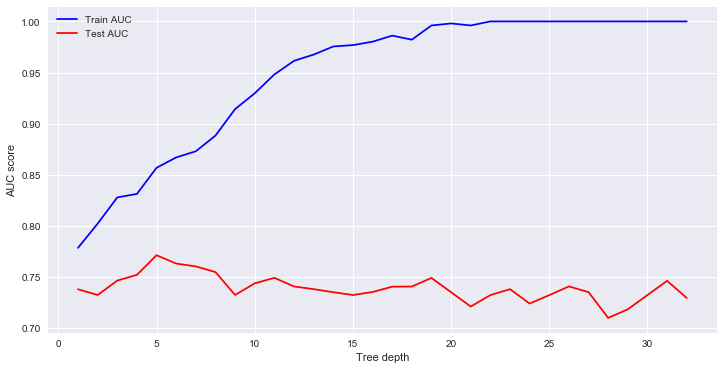

In [6]:
# Identify the optimal tree depth for given data 

# Create an array for max_depth values ranging from 1 to 32
max_depths = np.linspace(1, 32, 32, endpoint=True)

# Create empty lists where you'll place train and test results for the models 
# as you loop through each different maximum tree depth value 
train_results = []
test_results = []
for max_depth in max_depths:
    
    # instantiate the model and train it
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    dt.fit(X_train, y_train)
    
    # model evaluated on train set 
    train_pred = dt.predict(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(fpr, tpr)
    # Add AUC score to previous train results 
    train_results.append(roc_auc)
    
    # model evaluated on test set
    y_pred = dt.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    # Add AUC score to previous test results 
    test_results.append(roc_auc)
    
# Plot a graph to show under/overfitting and optimal value. 
plt.figure(figsize=(12, 6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

Your observations here: 

* Training error decreases with increasing tree depth; clear sign of overfitting
* Test error increases after depth = 5 -- nothing more to learn from deeper trees (some fluctuations, but not stable)
* Optimal value seen here is 3 -5 

## Minimum Sample Split 

Now check for the best `min_samples_splits` parameter for our decision tree. 

* Create an array for `min_sample_splits` values ranging from 0.1 to 1 with an increment of 0.1
* In a loop, train the classifier for each `min_samples_splits` value (10 runs) 
* Calculate the training and test AUC for each run. 
* Plot a graph to show under/over fitting and optimal value 
* Interpret the results 

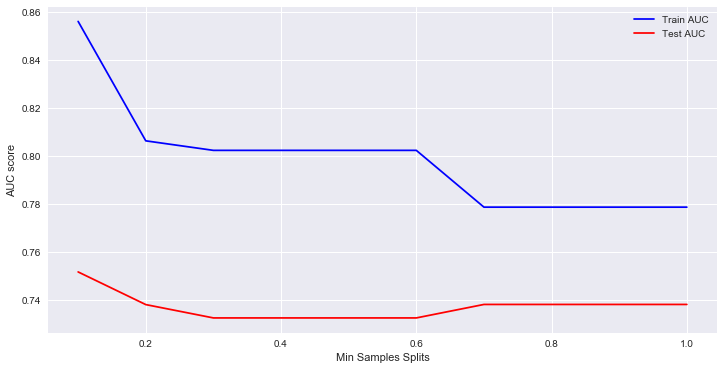

In [7]:
# Identify the optimal min_samples_split for given data 

# Create an array for min_samples_split values ranging from 0.1 to 1
min_samples_splits = np.linspace(0.1, 1, 10, endpoint=True)

# Create empty lists where you'll place train and test results for the models 
# as you loop through each different min_samples_split value 
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    
    # instantiate the model and train it
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split)
    dt.fit(X_train, y_train)
    
    # model evaluated on train set 
    train_pred = dt.predict(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(fpr, tpr)
    # Add AUC score to previous train results 
    train_results.append(roc_auc)
    
    # model evaluated on test set
    y_pred = dt.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    # Add AUC score to previous test results 
    test_results.append(roc_auc)
    
# Plot a graph to show under/overfitting and optimal value. 
plt.figure(figsize=(12, 6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min Samples Splits')
plt.legend()
plt.show()

Your observations: 
* AUC for both test and train data stabilize at 0.7
* Further increase in minimum sample split does not improve learning. 
* Optimal value of 0.4

## Minimum Sample Leafs 

Now check for the best `min_samples_leafs` parameter value for our decision tree. 

* Create an array for `min_samples_leafs` values ranging from 0.1 to 0.5 with an increment of 0.1
* In a loop, train the classifier for each `min_samples_leafs` value (5 runs) 
* Calculate the training and test AUC for each run. 
* Plot a graph to show under/over fitting and optimal value. 
* Interpret the results. 

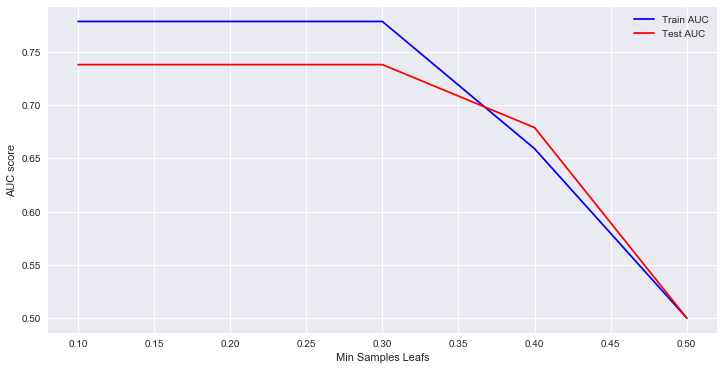

In [8]:
# Identify the optimal min_sample_leaf for given data 

# Create an array for min_samples_leaf values ranging from 0.1 to 0.5
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

# Create empty lists where you'll place train and test results for the models 
# as you loop through each different min_samples_leaf value 
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    
    # instantiate the model and train it
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)
    
    # model evaluated on train set 
    train_pred = dt.predict(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(fpr, tpr)
    # Add AUC score to previous train results 
    train_results.append(roc_auc)
    
    # model evaluated on test set
    y_pred = dt.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    # Add AUC score to previous test results 
    test_results.append(roc_auc)
    
# Plot a graph to show under/overfitting and optimal value. 
plt.figure(figsize=(12, 6))
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min Samples Leafs')
plt.legend()
plt.show()

Your observations here: 

* AUC gives best value between 0.2 and 0.3 for both test and training sets. 
* The accuracy drops down as we increase the parameter value. 

## Maximum Features 

Now check for the best `max_features` parameter value for our decision tree. 

* Create an array for `max_features` values ranging from 1 - 12 (1 features to all) 
* In a loop, train the classifier for each max_features value (12 runs) 
* Calculate the training and test AUC for each run. 
* Plot a graph to show under/over fitting an optimal value 
* Interpret the results 

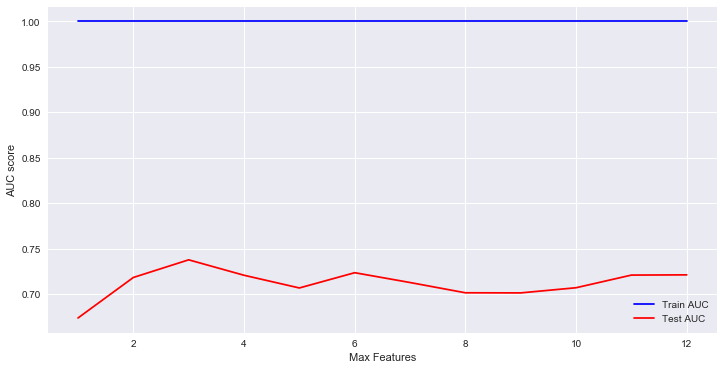

In [9]:
# Find the best value for maximum feature size 

# Create an array for max_features values ranging from 1 to 12
max_features = list(range(1, X_train.shape[1]))

# Create empty lists where you'll place train and test results for the models 
# as you loop through each different max_features value 
train_results = []
test_results = []
for max_feature in max_features:
    
    # instantiate the model and train it
    dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature)
    dt.fit(X_train, y_train)
    
    # model evaluated on train set 
    train_pred = dt.predict(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(fpr, tpr)
    # Add AUC score to previous train results 
    train_results.append(roc_auc)
    
    # model evaluated on test set
    y_pred = dt.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    # Add AUC score to previous test results 
    test_results.append(roc_auc)
    
# Plot a graph to show under/overfitting and optimal value. 
plt.figure(figsize=(12, 6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Max Features')
plt.legend()
plt.show()

Your observations here:

* No clear effect on the training dataset -- flat AUC
* Some fluctuations in test AUC but not definitive enough to make a judgement
* highest AUC value seen at 5

## Re-train the classifier with chosen values 

So now we shall use the best values from each training phase above and feed it back to our classifier, and see if we have any improvement in predictive performance. 

* Train the classifier with optimal values identified. 
* Compare the AUC with vanilla DT AUC.
* Interpret the results of comparison. 

In [10]:
# Train a classifier with the optimal values identified above
dt = DecisionTreeClassifier(criterion='entropy', 
                            max_features=6, 
                            max_depth=5, 
                            min_samples_split=0.4, 
                            min_samples_leaf=0.25)
dt.fit(X_train, y_train)

# Get predictions on test set 
y_pred = dt.predict(X_test)

# Evaluate results 
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
roc_auc

0.7379525593008739

Your observations here: 

* Vanilla DT had an AUC of 0.748; we improved this AUC to a value of 0.769 with some tuning! 

* **Due to randomness, results may slightly differ, there is some improvement in most cases.**

* With more complicated datasets, we might see an even bigger improvement in AUC/accuracy of the classifier. 

In the next section, we shall talk about hyper-parameter tuning using a technique called "grid-search" to make this process even more granular and decisive. 

## Summary 

In this lesson, we looked at tuning a decision tree classifier in order to avoid over fitting and increasing the generalization capabilities of the classifier. For the Titanic dataset, we see that identifying optimal parameter values can result in some improvements towards predictions. This idea will be exploited further in upcoming lessons and labs. 